In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload= files.upload()

Saving twitter_training.csv to twitter_training.csv


In [3]:
dt = pd.read_csv('twitter_training.csv', names=['ID', 'Topic', 'Sentiment', 'Tweet'], header=None)
dt.head(10)

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [4]:
dt.tail(10)

,ID,Topic,Sentiment,Tweet
74672,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...
74673,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...
74674,9199,Nvidia,Positive,Let a no information elim that go unnoticed......
74675,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...
74676,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
dt.columns

Index(['ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [6]:
dt.index

RangeIndex(start=0, stop=74682, step=1)

In [7]:
dt.shape

(74682, 4)

In [8]:
dt.size

298728

In [9]:
dt.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [10]:
dt.isna().sum()

,0
ID,0
Topic,0
Sentiment,0
Tweet,686


In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
# Define a function to handle non-string values
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0

In [13]:
# Perform sentiment analysis
dt['Polarity'] = dt['Tweet'].apply(analyze_sentiment)

# Categorize sentiment
dt['Sentiment_Label'] = dt['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

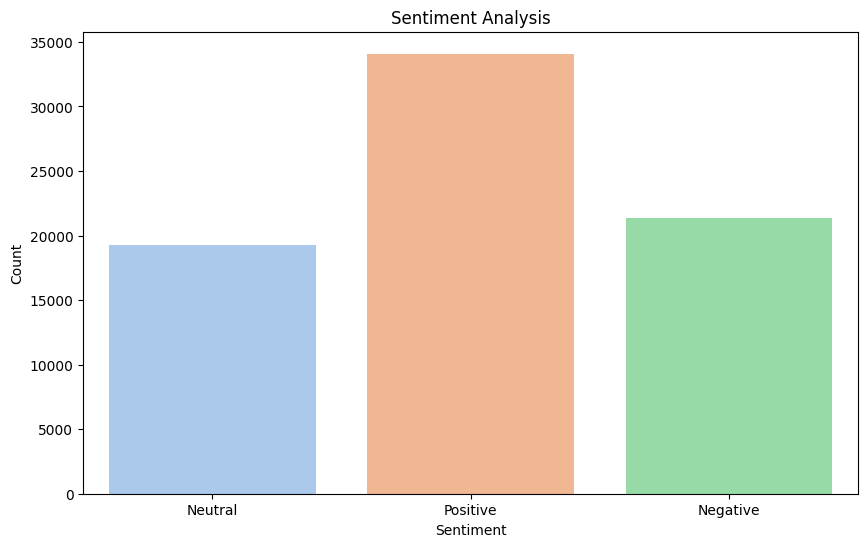

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dt, x='Sentiment_Label', palette='pastel')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

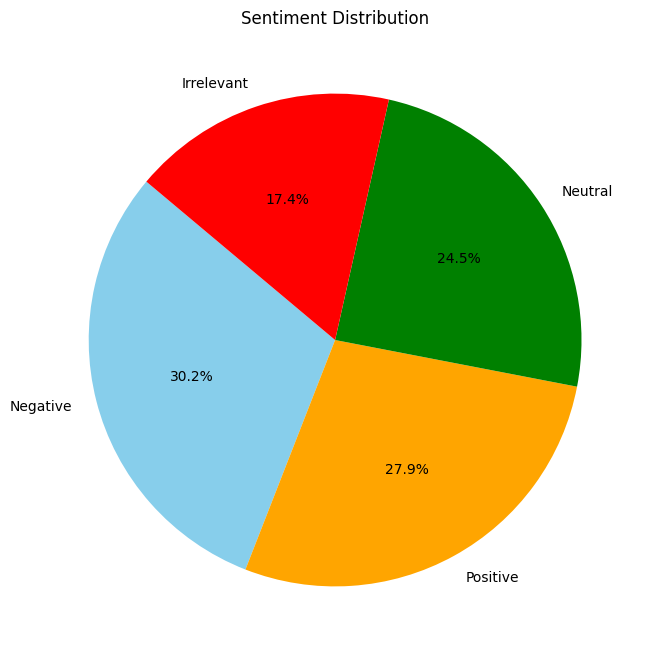

In [31]:
# Calculate the counts for each sentiment
sentiment_counts = dt['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

<Figure size 1500x800 with 0 Axes>

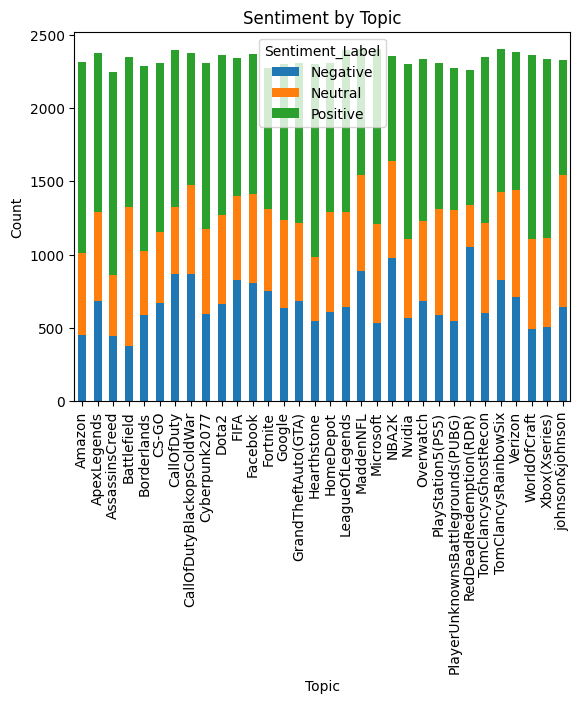

In [23]:
# Analyze sentiment by topic
plt.figure(figsize=(15,8))
sentiment_by_topic = dt.groupby(['Topic', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

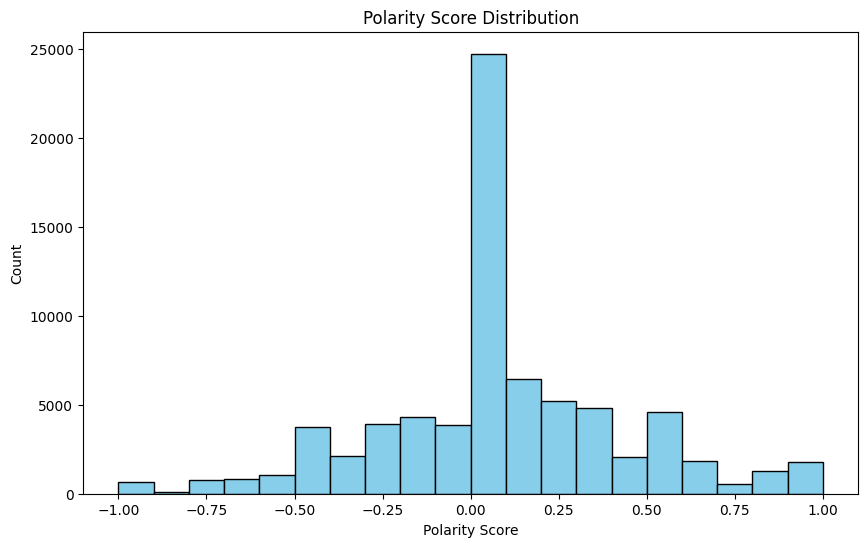

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(dt['Polarity'], bins=20, edgecolor='k',color='skyblue')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

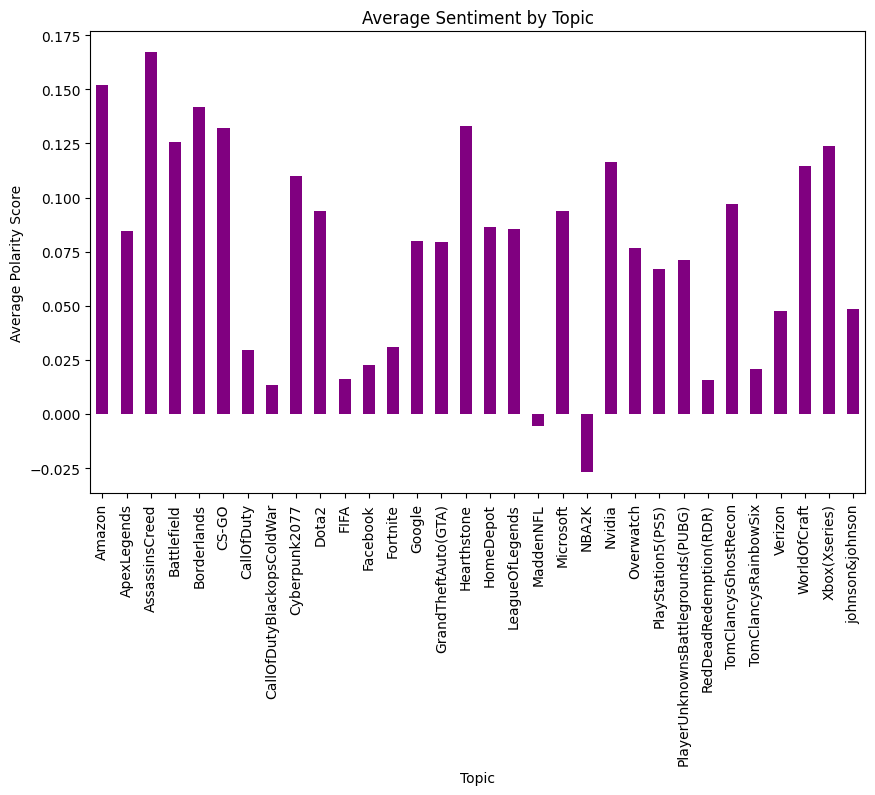

In [37]:
plt.figure(figsize=(10, 6))
average_polarity_by_topic = dt.groupby('Topic')['Polarity'].mean()
average_polarity_by_topic.plot(kind='bar',color='purple')
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Polarity Score')
plt.show()

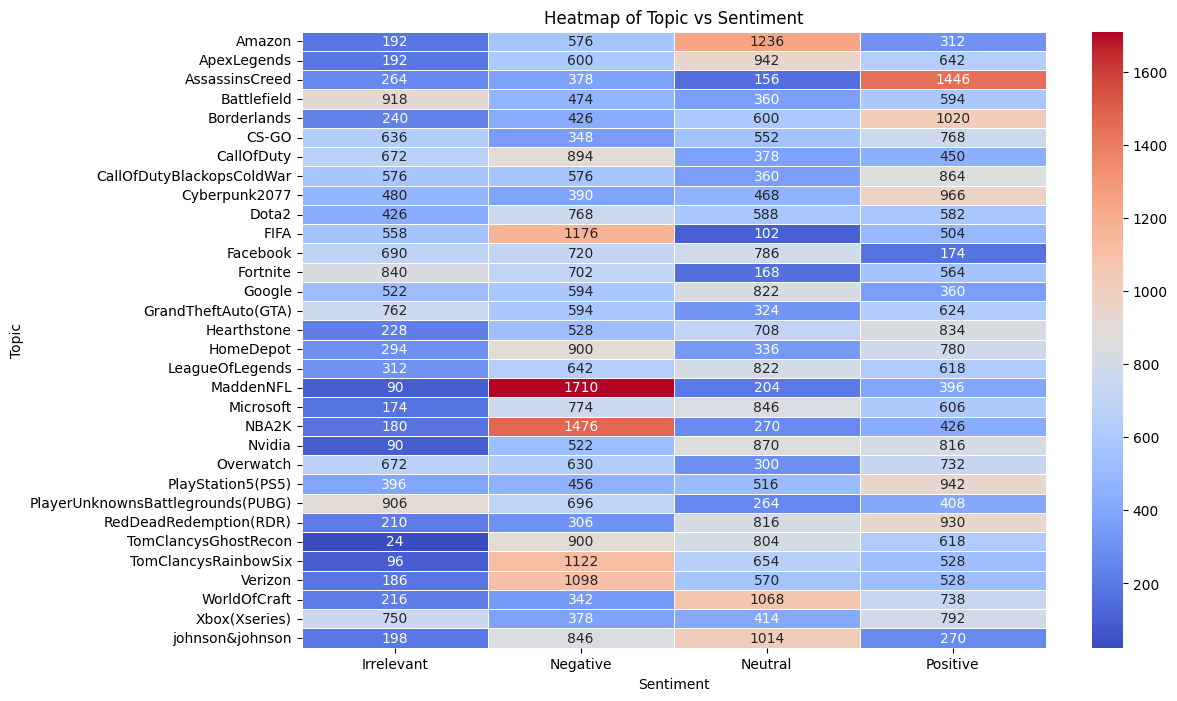

In [39]:
# Create the crosstab
crosstab = pd.crosstab(index=dt['Topic'], columns=dt['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()